<a href="https://colab.research.google.com/github/clau17be/Predict-Price-Insurances/blob/main/Copy_of_tratar_datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving train.csv to train.csv


In [2]:
import pandas as pd
df = pd.read_csv('train.csv')
df.head()
#print(df.shape)

FileNotFoundError: [Errno 2] No such file or directory: 'train.csv'

<Axes: xlabel='Premium Amount', ylabel='Count'>

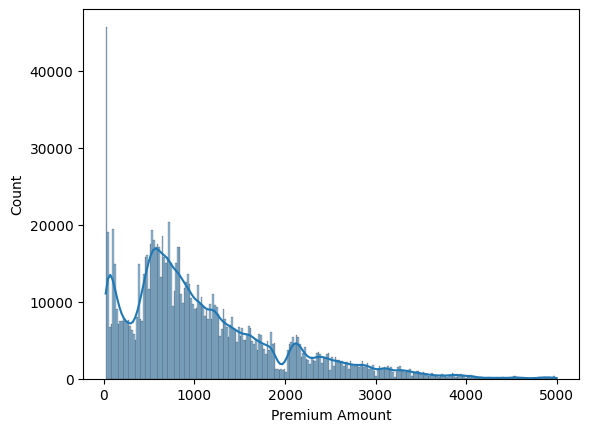

In [ ]:
import seaborn as sns
sns.histplot(df['Premium Amount'], kde=True)

In [ ]:
# Filtrar: quedarse solo con el 5% inferior y el 5% superior
df1 = df[(df['Premium Amount'] >= 500) & (df['Premium Amount'] <= 3500)]

<Axes: xlabel='Premium Amount', ylabel='Count'>

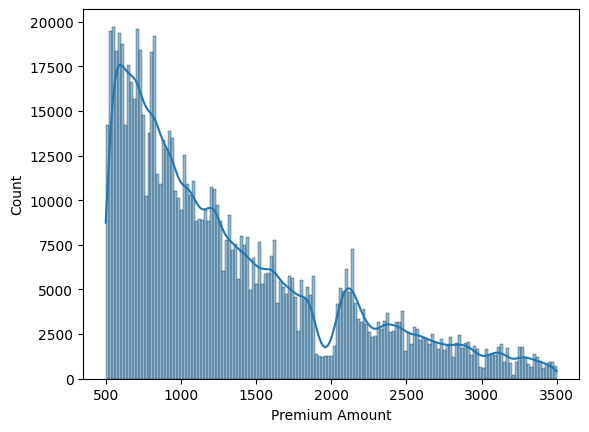

In [ ]:
import seaborn as sns
sns.histplot(df1['Premium Amount'], kde=True)

In [ ]:
df_numeric = df1.select_dtypes(include=['number'])  # solo columnas numéricas

In [ ]:
import seaborn as sns
df_numeric.info()
# Check for missing values in each column
df_numeric.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Index: 886811 entries, 0 to 1199999
Data columns (total 10 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    886811 non-null  int64  
 1   Age                   873089 non-null  float64
 2   Annual Income         864218 non-null  float64
 3   Number of Dependents  806186 non-null  float64
 4   Health Score          822965 non-null  float64
 5   Previous Claims       621087 non-null  float64
 6   Vehicle Age           886806 non-null  float64
 7   Credit Score          787730 non-null  float64
 8   Insurance Duration    886810 non-null  float64
 9   Premium Amount        886811 non-null  float64
dtypes: float64(9), int64(1)
memory usage: 74.4 MB


,0
id,0
Age,13722
Annual Income,22593
Number of Dependents,80625
Health Score,63846
Previous Claims,265724
Vehicle Age,5
Credit Score,99081
Insurance Duration,1
Premium Amount,0


In [ ]:
#df = df.dropna() # Quitamos los na
df_numeric1 = df_numeric.fillna(df_numeric.mean(numeric_only=True))
df_numeric1.info()


<class 'pandas.core.frame.DataFrame'>
Index: 886811 entries, 0 to 1199999
Data columns (total 10 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    886811 non-null  int64  
 1   Age                   886811 non-null  float64
 2   Annual Income         886811 non-null  float64
 3   Number of Dependents  886811 non-null  float64
 4   Health Score          886811 non-null  float64
 5   Previous Claims       886811 non-null  float64
 6   Vehicle Age           886811 non-null  float64
 7   Credit Score          886811 non-null  float64
 8   Insurance Duration    886811 non-null  float64
 9   Premium Amount        886811 non-null  float64
dtypes: float64(9), int64(1)
memory usage: 74.4 MB


Se seleccionan las variables que sean texto y se generan dummys por cada valor interno con esto ya la variable pasa a ser numerica para el modelo

In [ ]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

cat_cols = ['Marital Status', 'Gender', 'Education Level', 'Occupation', 'Location',
            'Policy Type', 'Customer Feedback', 'Smoking Status', 'Exercise Frequency', 'Property Type']

encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
X_encoded = encoder.fit_transform(df[cat_cols])
X_encoded_df = pd.DataFrame(X_encoded, columns=encoder.get_feature_names_out(cat_cols))

df_final = pd.concat([df.drop(columns=cat_cols).reset_index(drop=True), X_encoded_df], axis=1)


nos quedo faltando hacer el encode para la variable de fecha ya que era un proceso muy dispedoso por lo que se decidio eliminar la columna.

In [ ]:
df_numeric = df_final.select_dtypes(include=['number'])  # solo columnas numéricas
df_numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255358 entries, 0 to 255357
Data columns (total 39 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           255358 non-null  int64  
 1   Age                          255358 non-null  float64
 2   Annual Income                255358 non-null  float64
 3   Number of Dependents         255358 non-null  float64
 4   Health Score                 255358 non-null  float64
 5   Previous Claims              255358 non-null  float64
 6   Vehicle Age                  255358 non-null  float64
 7   Credit Score                 255358 non-null  float64
 8   Insurance Duration           255358 non-null  float64
 9   Marital Status_Divorced      255358 non-null  float64
 10  Marital Status_Married       255358 non-null  float64
 11  Marital Status_Single        255358 non-null  float64
 12  Gender_Female                255358 non-null  float64
 13 

Se quiere ver la distribucion de target so it can give a better idea what model can work better with this tipe of data

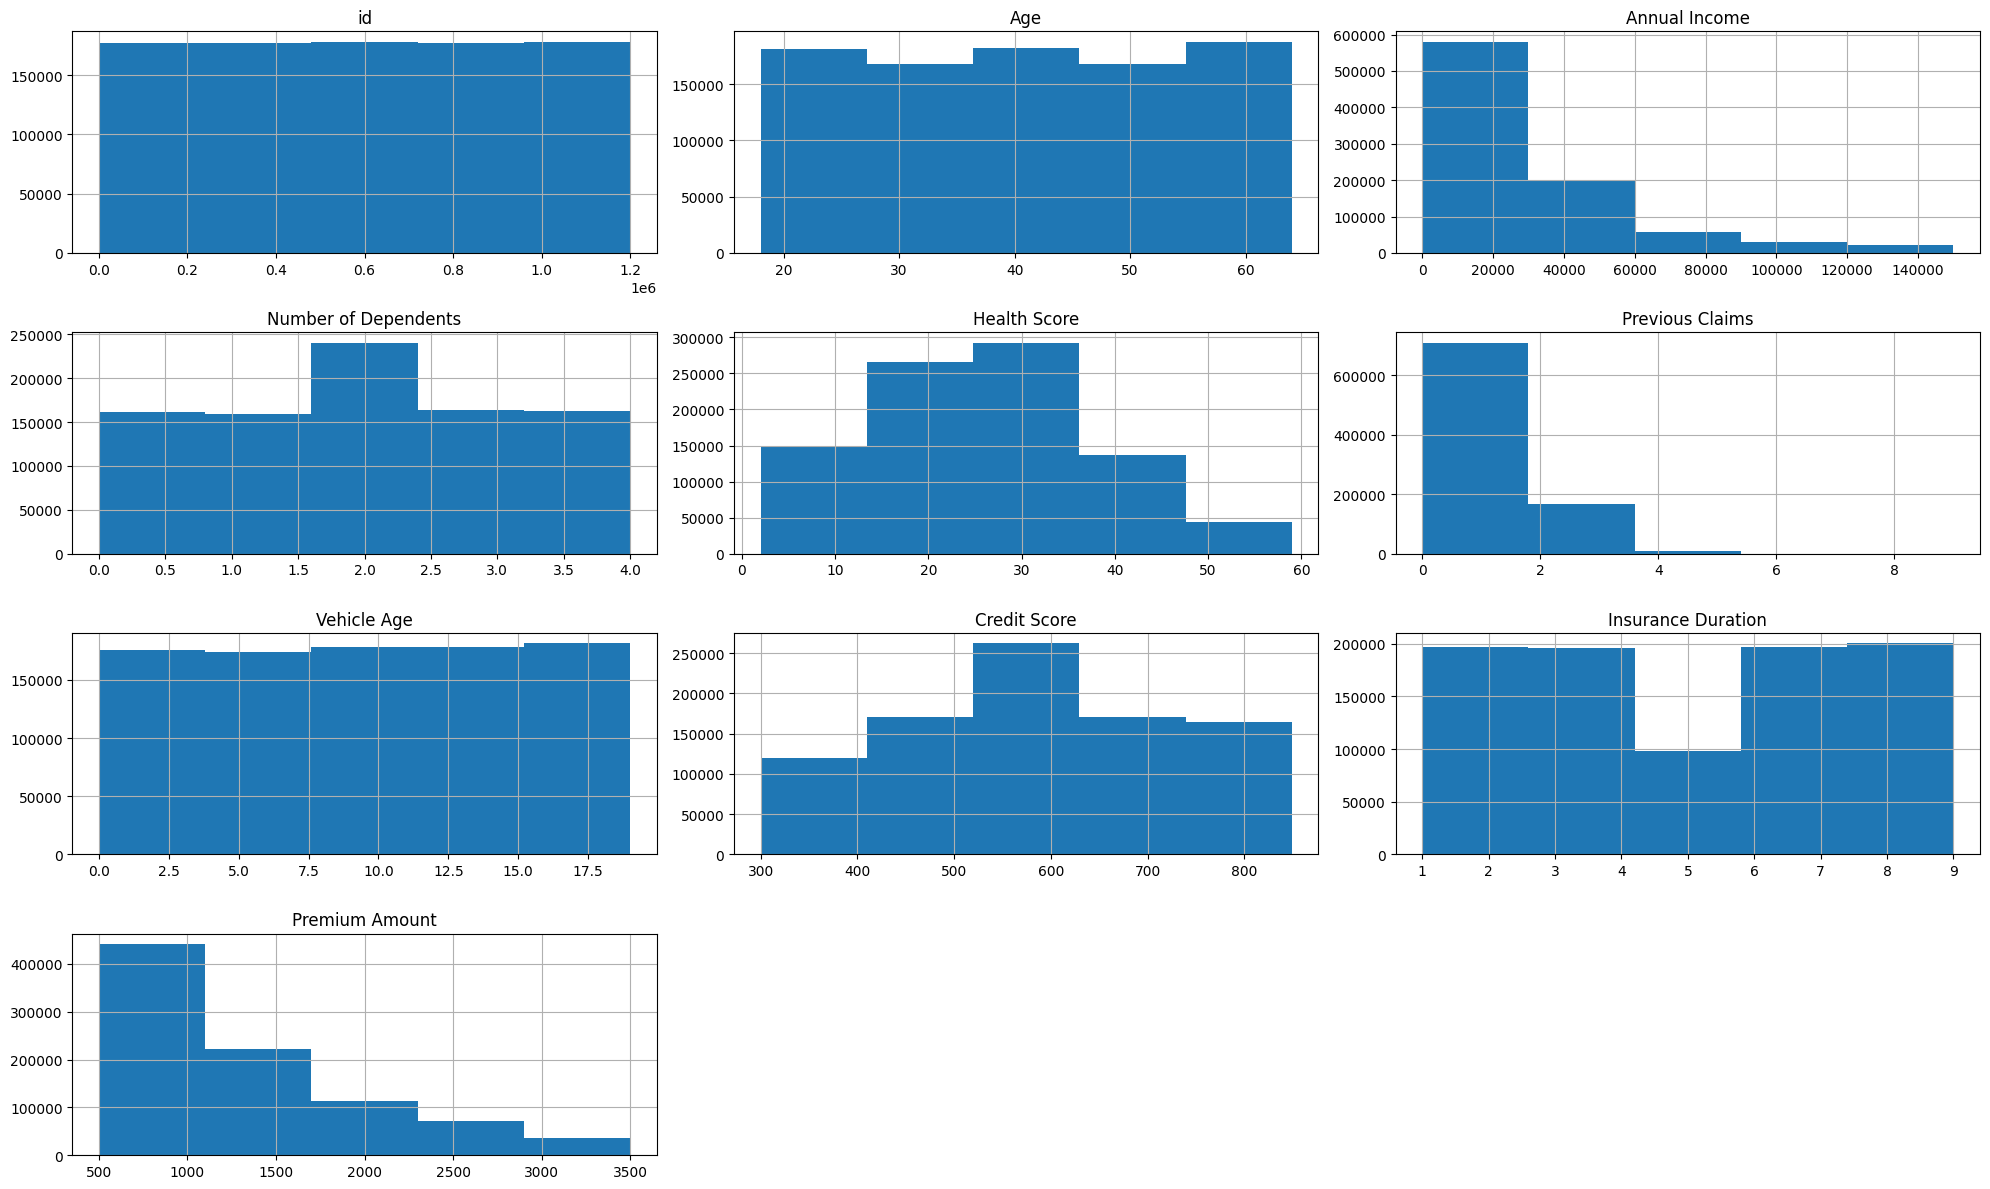

In [ ]:
# Plot histograms for numeric features
import matplotlib.pyplot as plt
df_numeric1.hist(bins=5, figsize=(20, 12))
plt.tight_layout()
plt.show()

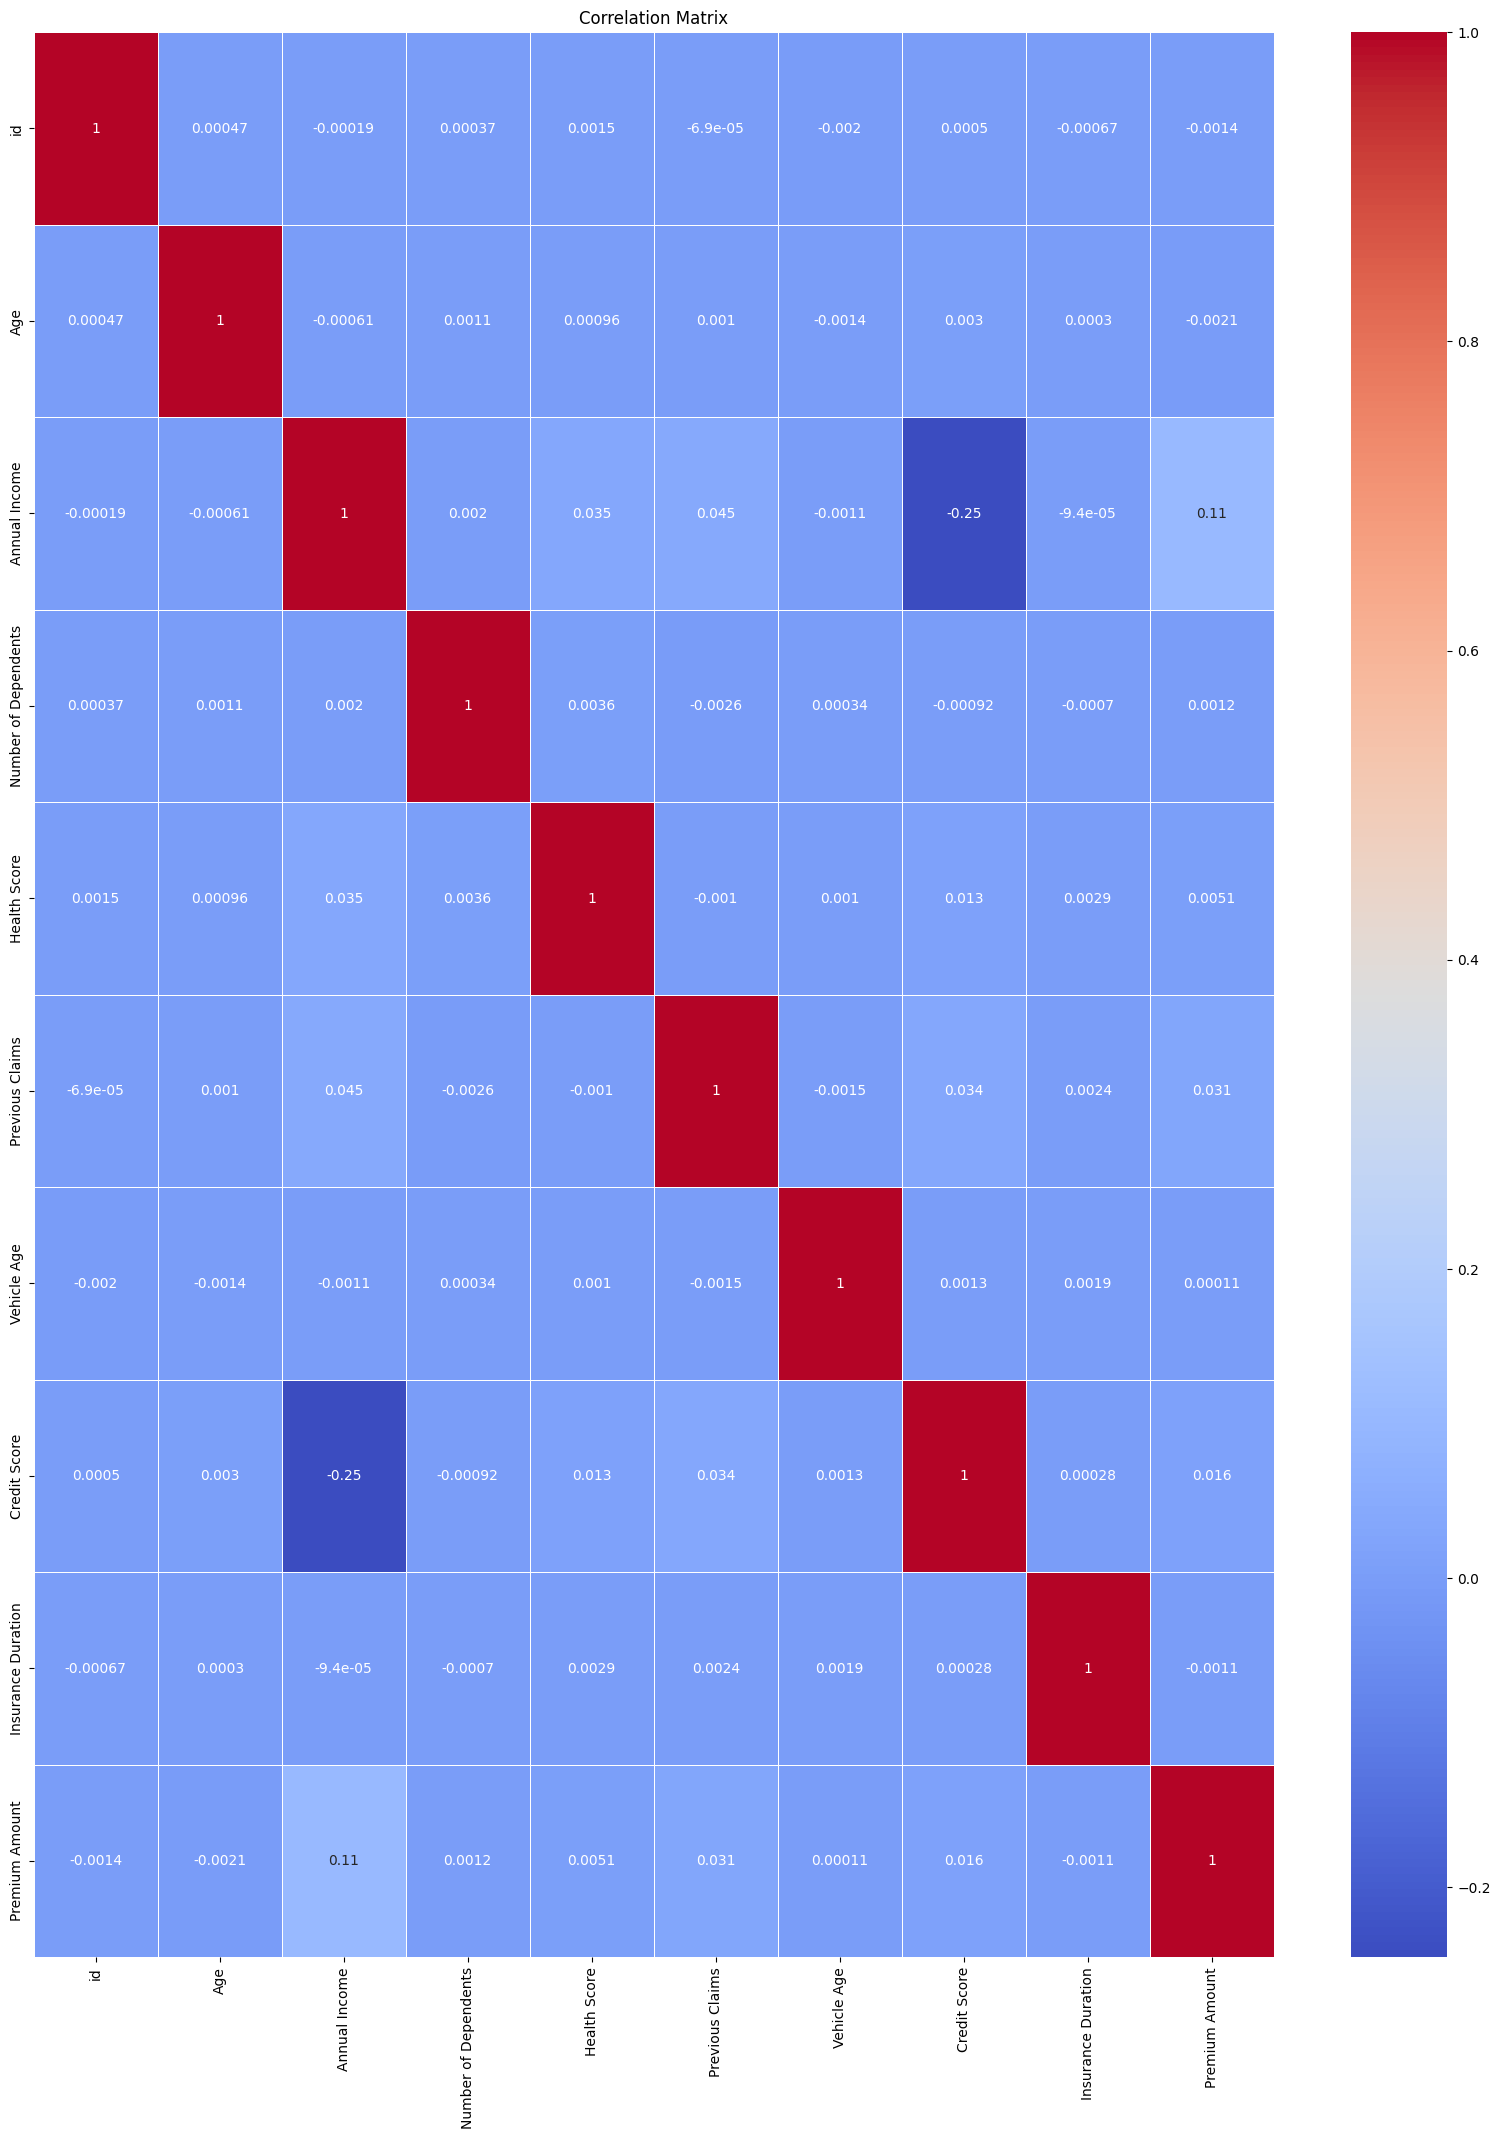

In [ ]:
# Compute correlation matrix
corr_matrix = df_numeric1.corr()

# Generate a heatmap of the correlations
plt.figure(figsize=(20, 25))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

# Red positive correlation As one variable increases, the other variable also increases.
# Blue negative correlation As one variable increases, the other variable decreases.
# Zero correlation (white or near-white): There is no significant relationship between the two variables.
# 0 to 0.3: Weak or no correlation.
# 0.3 to 0.7: Moderate positive correlation.
# 0.7 to 1.0: Strong positive correlation.
# -0.3 to -0.7: Moderate negative correlation.
# -0.7 to -1.0: Strong negative correlation.

# If two features have a high positive correlation, you might consider removing one of them to avoid
# multicollinearity (i.e., when two features are too similar, which can lead to problems in some
# machine learning models).

In [ ]:
#df = df_numeric.drop(columns=['id','Marital Status_Divorced','Marital Status_Single','Gender_Female','Education Level_High School','Education Level_PhD','Occupation_Self-Employed',
   #                   'Occupation_Unemployed','Location_Rural','Location_Suburban','Policy Type_Basic','Policy Type_Comprehensive','Customer Feedback_Good',
      #                'Exercise Frequency_Daily','Exercise Frequency_Monthly','Exercise Frequency_Rarely','Customer Feedback_Poor','Smoking Status_No','Property Type_Condo',
          #            'Property Type_House'])
df2 = df_numeric1.drop(columns=['id'])

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 886811 entries, 0 to 1199999
Data columns (total 9 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Age                   886811 non-null  float64
 1   Annual Income         886811 non-null  float64
 2   Number of Dependents  886811 non-null  float64
 3   Health Score          886811 non-null  float64
 4   Previous Claims       886811 non-null  float64
 5   Vehicle Age           886811 non-null  float64
 6   Credit Score          886811 non-null  float64
 7   Insurance Duration    886811 non-null  float64
 8   Premium Amount        886811 non-null  float64
dtypes: float64(9)
memory usage: 67.7 MB


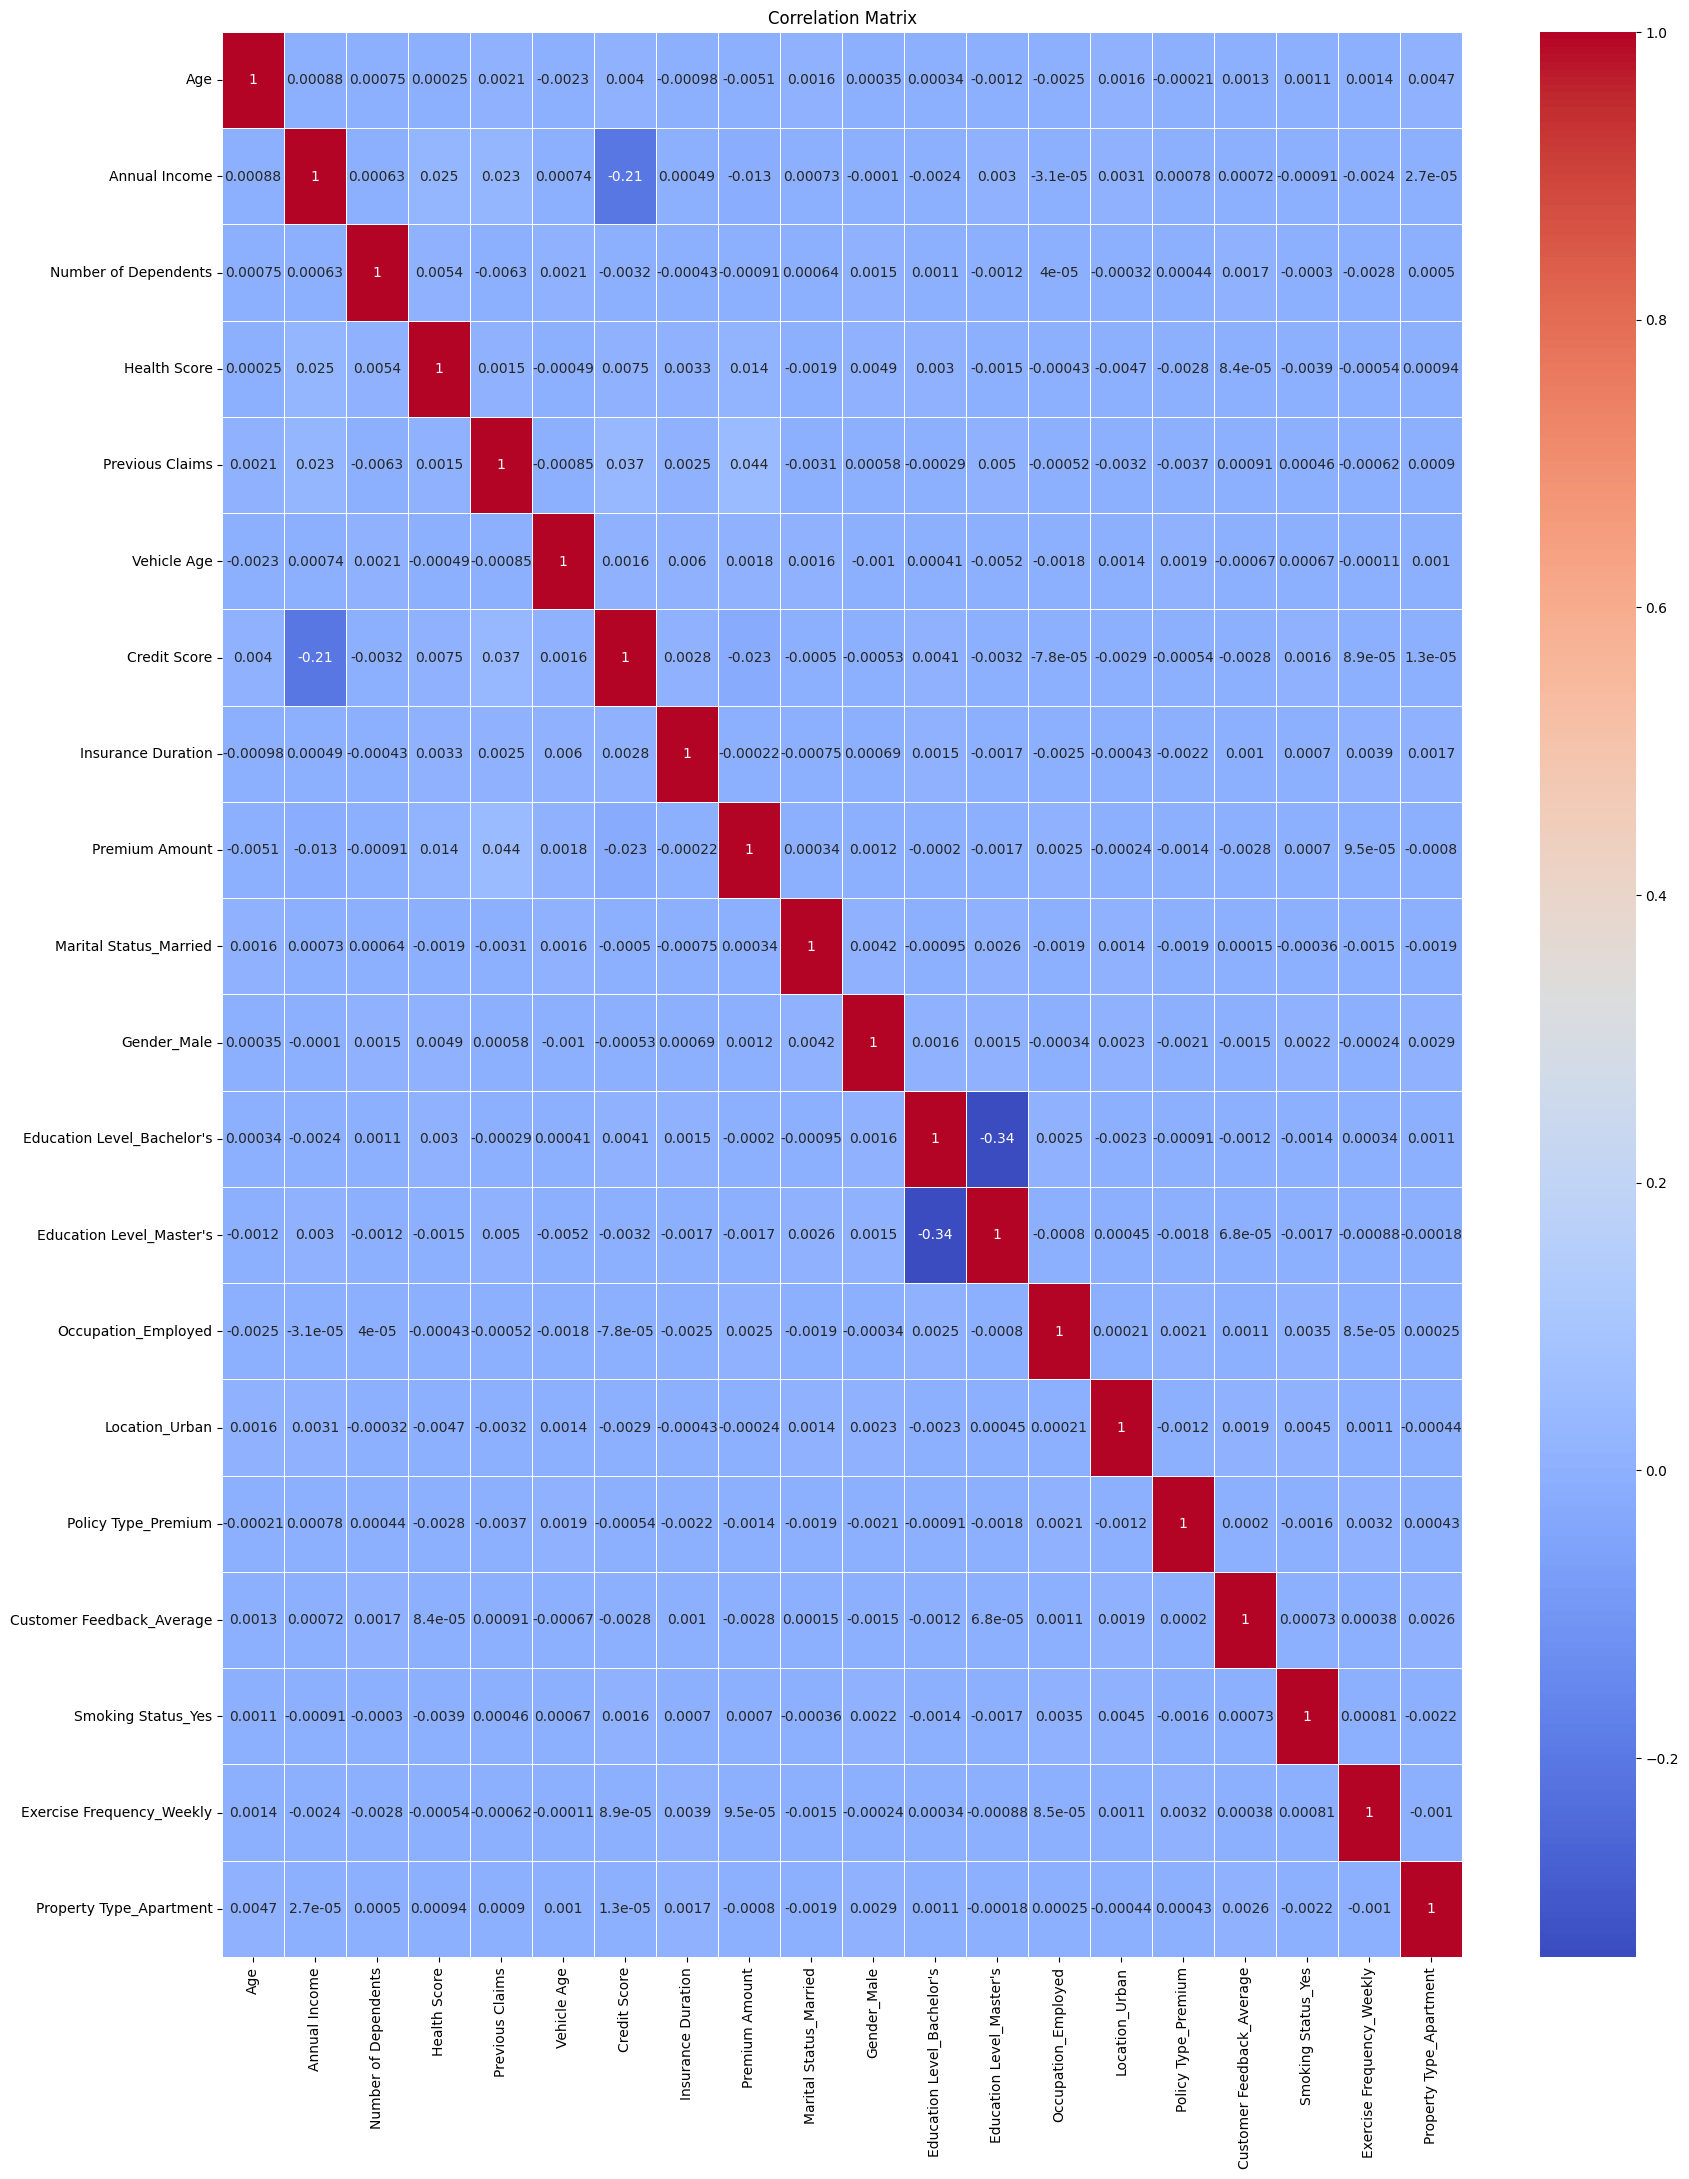

In [ ]:
# Compute correlation matrix
corr_matrix = df.corr()

# Generate a heatmap of the correlations
plt.figure(figsize=(20, 25))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

# Red positive correlation As one variable increases, the other variable also increases.
# Blue negative correlation As one variable increases, the other variable decreases.
# Zero correlation (white or near-white): There is no significant relationship between the two variables.
# 0 to 0.3: Weak or no correlation.
# 0.3 to 0.7: Moderate positive correlation.
# 0.7 to 1.0: Strong positive correlation.
# -0.3 to -0.7: Moderate negative correlation.
# -0.7 to -1.0: Strong negative correlation.

# If two features have a high positive correlation, you might consider removing one of them to avoid
# multicollinearity (i.e., when two features are too similar, which can lead to problems in some
# machine learning models).

In [ ]:
corr_matrix = df2.corr(numeric_only=True)
corr_matrix["Premium Amount"].sort_values(ascending=False)

,Premium Amount
Premium Amount,1.000000
Annual Income,0.105236
Previous Claims,0.031379
Credit Score,0.016154
Health Score,0.005060
Number of Dependents,0.001196
Vehicle Age,0.000112
Insurance Duration,-0.001105
Age,-0.002068


In [ ]:
#df.to_csv('mi_archivo.csv', index=False)
#from google.colab import files
#files.download('mi_archivo.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [1]:
# Define your features (X) and target variable (y)
X = df2.drop('Premium Amount', axis=1)  # All columns except 'target'
y = df2['Premium Amount']  # The target column

NameError: name 'df2' is not defined

In [ ]:
from sklearn.model_selection import train_test_split
# Split the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Fit and transform the training data, then transform the testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

# 6. Hacer predicciones sobre el test
y_pred = lr_model.predict(X_test_scaled)

In [ ]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score
nn_model = MLPRegressor(hidden_layer_sizes=(32,), max_iter=200, random_state=42)
nn_model.fit(X_train_scaled, y_train)
y_pred_nn = nn_model.predict(X_test_scaled)


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


In [ ]:
# 8. Evaluación y comparación
print("📊 Model Comparison (Validation Set)\n")

print("🔹 Linear Regression")
print("MSE:", mean_squared_error(y_test, y_pred))
print("R²:", r2_score(y_test, y_pred))

#print("\n🔹 Neural Network (MLPRegressor)")
#print("MSE:", mean_squared_error(y_test, y_pred_nn))
#print("R²:", r2_score(y_test, y_pred_nn))

📊 Model Comparison (Validation Set)

🔹 Linear Regression
MSE: 497776.79366021807
R²: 0.013030134548070782
